<a href="https://colab.research.google.com/github/victorviro/Deep_learning_python/blob/master/Introduction_artificial_neural_networks_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to artificial neural networks with Keras


An ANN (*artificial neural network*) is a Machine Learning model inspired by the networks of biological neurons found in our brains. However, ANNs have gradually become quite different from their biological cousins.

ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks such as classifying billions of images (e.g., Google Images), powering speech recognition services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go (DeepMind’s AlphaGo).

The first part of this article introduces artificial neural networks, starting with a quick tour of the very first ANN architectures and leading up to Multilayer Perceptrons (MLPs), which are heavily used today. In the second part, we will look at how to implement neural networks using the popular Keras API. This is a beautifully designed and simple high-level API for building, training, evaluating, and running neural networks.

ANNs were first introduced back in 1943 by the neurophysiologist Warren McCulloch and the mathematician Walter Pitts. Their work presented a simplified computational model of how biological neurons might work together in animal brains to perform complex computations using propositional logic. This was the first artificial neural network architecture.

The early successes of ANNs led to the belief that we would soon be conversing with truly intelligent machines. When it became clear in the 1960s that this promise would go unfulfilled (at least for quite a while) ANNs entered a long winter. In the early 1980s, new architectures were invented and better training techniques were developed, sparking a revival of interest. But progress was slow, and by the 1990s other powerful Machine Learning techniques were invented, such as Support Vector Machines. These techniques seemed to offer better results and stronger theoretical foundations than ANNs, so once again the study of neural networks was put on hold.


We are now in another wave of interest in ANNs. There are a few good reasons to believe that this time is different and that the renewed interest in ANNs will have a much more profound impact on our lives:

- There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.

- The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time. This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. Moreover, cloud platforms have made this power accessible to everyone.

- The training algorithms have been improved.


- ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them, resulting in more and more progress and even more amazing products.

## Logical Computations with Neurons

McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as an *artificial neuron*: it has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. In their paper, they showed that even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition you want. To see how such a network works, let’s build a few ANNs that perform various logical computations (see Figure 10-3), assuming that a neuron is activated when at least two of its inputs are active.

![](https://i.ibb.co/bPMYwPy/logical-anns.png)

- The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.

- The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).

- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).

- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

You can imagine how these networks can be combined to compute complex logical expressions.



## The Perceptron



The *Perceptron* is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron (see Figure 10-4) called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $z=w_1x_1+...+w_nx_n=\boldsymbol{x}^T\boldsymbol{w}$, then applies a step function to that sum and outputs the result: $h_w(\boldsymbol{x})=\text{step}(z)$, where $z=\boldsymbol{x}^T\boldsymbol{w}$.

![texto alternativo](https://i.ibb.co/z2Bd7Zg/tlu.png)

The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

$$\text{heaviside}(z)=\begin{cases}
              0&\text{if }z<0,\\
              1&\text{if }z\geq0.
\end{cases}$$


$$\text{sgn}(z)=\begin{cases}
              -1&\text{if }z< 0,\\
               0&\text{if }z=0,\\
               1&\text{if }z> 0.
\end{cases}$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise it outputs the negative class (just like a Logistic Regression or linear SVM classifier).

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a *fully connected layer*, or a *dense layer*. The inputs of the Perceptron are fed to special passthrough neurons called *input neurons*: they output whatever input they are fed. All the input neurons form the *input layer*. Moreover, an extra bias feature is generally added ($x_0 = 1$): it is typically represented using a special type of neuron called a *bias neuron*, which outputs 1 all the time. A Perceptron with two inputs and three outputs is represented in Figure 10-5. This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

![texto alternativo](https://i.ibb.co/dBGW8cf/perceptron.png)

Thanks to the magic of linear algebra, the next equation makes it possible to efficiently compute the outputs of a layer of artificial neurons for several instances at once.

$$h_{\boldsymbol{Wb}}(\boldsymbol{X})=\phi(\boldsymbol{XW}+\boldsymbol{b})$$

- $\boldsymbol{X}$ represents the matrix of input features. It has one row per instance and one column per feature.

- The weight matrix $\boldsymbol{W}$ contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer.

- The bias vector $\boldsymbol{b}$ contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.

- The function $\phi$ is called the *activation function*: when the artificial neurons are TLUs, it is a step function (but there are other activation functions).

So, how is Perceptron trained? Perceptrons are trained using a variant of the Hebb’s rule that takes into account the error made by the network when it makes a prediction. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution.

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. This is one reason to prefer Logistic Regression over Perceptrons.

There are several weaknesses of Perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR) classification problem; see the left side of Figure 10-6). This is true of any other linear classification model (such as Logistic Regression classifiers).

It turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a *Multilayer Perceptron* (MLP). An MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right side of Figure 10-6: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown. 

![texto alternativo](https://i.ibb.co/xLwBXSz/xor-problem.png)

## Multi-layer Perceptron and Backpropagation

An MLP is composed of one input layer, one or more hidden layers of [artificial neurons](https://en.wikipedia.org/wiki/Artificial_neuron) (particularly TLUs or threshold logic units) and one final layer of TLUs called the output layer. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.



![texto alternativo](https://www.oreilly.com/library/view/getting-started-with/9781786468574/graphics/B05474_04_05.jpg)

The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network.

When an ANN contains a lot of hidden layers is known as a *deep neural network* and these networks are the base of the study of Deep learning, and more generally models containing deep stacks of computations.

The interest for these networks begun in 1986 when the backpropagation training algorithm was introduced. 






The backpropagation algorithm is based in two passes through the network (one forward, one backward). Let's see it in detail.


- It handles one mini-batch at a time, this is, it goes through to the full training set multiple times. Each pass is an epoch.


- Each mini-batch is passed to the input layer, which sends it to the first hidden layer. Then computes the output of all the neurons in this layer and passes the result on to the next layer. This process is repeated until getting the output of the last layer. This is the forward pass. It is like making a prediction, except all intermediate results are preserved for the backward pass.


- The algorithm measures the network's output error, it uses a loss function that compares the desired output and the actual output of the network and returns some measure of the error.

- Then it goes through each layer in reverse (backward pass) computing how much each output connection contributed to the error (applying *chain rule*) and finally tweaks the weights of the connections to reduce the error (Gradient Descent step).

![texto alternativo](https://i.stack.imgur.com/7Ui1C.png)

Note: It is important to initialize all the hidden layer's connection weight randomly.

The authors of this algorithm replaced the step function with the logistic (sigmoid) function $\sigma(z)=\frac{1}{1+e^{-z}}$. This was essential because the step function contains only flat segments, so there is no gradient to work with (Gradient Descent cannot move on a flat surface), while the logistic function has a well-defined nonzero derivative, allowing Gradient Descent to make progress at every step. Backpropagation works well with other activation functions as well, like hyperbolic tangent function, Relu...



- The hyperbolic tangent function: $\text{tanh}(z)= 2\sigma(2z)–1$.
Just like the logistic function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the logistic function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

- The Rectified Linear Unit function: $\text{ReLU}(z)=\text{max}(0,z)$
The ReLU function is continuous but unfortunately not differentiable at z = 0 (the slope changes abruptly, which can make Gradient Descent bounce around), and its derivative is 0 for z < 0. In practice, however, it works very well and has the advantage of being fast to compute. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent.

These popular activation functions and their derivatives are represented in Figure 10-8.

![texto alternativo](https://i.ibb.co/zXKq7cC/activation-functions.png)

But why do we need activation functions between layers?. If you apply chain rule on several linear transformations you will get a linear transformation. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. The purpose of the activation function is to introduce non-linearity into the network.

### Regression MLPs

MLPs can be used for regression tasks. For univariate regression (predict a single value) you need a single output neuron (the predicted value). For multivariate regression (predict multiple values at once), you need one output neuron per output dimension.

In general, when building an MLP for regression it is not usually used activation function for the output neurons (they are free to output any range of values). However, if you want that outputs will always be positive, you can use the ReLU activation function, or softplus (a smooth variant of ReLU) in the output layer. Finally, if you want that the predictions will fall within a given range of values you can use the logistic function or hyperbolic tangent, and scale the labels to the adequate range.

The loss function typically is the mean squared error, but there are others like mean absolute error or Huber loss(a good choice if the training set has a lot of outliers).


### Clasification MLPs


MLPs can be used for classification tasks. For binary classification, you need a single output neuron using the logistic activation function(the predicted value will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class).

For multi-label binary classification, for example, predicts whether the incoming email is spam or no-spam, and simultaneously predicts whether it is an urgent or non-urgent email. In this case, you would need two output neurons, both using the logistic function: the first output will be the probability estimated that the email is spam and the second the probability estimated that the email is urgent. Generally, you can use one output neuron for each positive class.

For multiclass classification, this is when target variable can belong to more than two labels (for example classes 0 through 9 for digit image classification), you need to have one output neuron per class and you can use the softmax activation function for the whole output layer (softmax activation function ensure that all estimated probabilities are between 0 and 1).

Regarding the loss function, we are predicting probability distributions, the cross-entropy is generally a good option.

# MNIST fashion dataset

![texto alternativo](https://camo.githubusercontent.com/a2e4e2eb7beebba0496cdf0bd08761636b6ecddd/68747470733a2f2f692e6779617a6f2e636f6d2f30666237313934393761386236366164393938643132333561663237643930312e706e67)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [0]:
print(X_train_full.shape)

(60000, 28, 28)


The dataset is already split into a training set and a test set.

Since we are going to train the neural network using Gradient Descent, we must scale the input feature. We just scale the pixel intensity down to the 0-1 range by dividing them by 255.0.

In [0]:
X_train_full = X_train_full / 255.0


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images. Each label is an integer between 0 and 9.

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# let's see what class represent the first image
class_names[y_train_full[0]]

'Ankle boot'

### Creating a model using Sequential API
Now let’s build the neural network. It is a classification MLP with two hidden layers.

In [0]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])



- The first line creates a  `Sequential` model. This is the simplest kind of Keras model, for neural networks that are just composed of a single stack of layers, connected sequentially. This is called the sequential API.

- Next, pass a list of layers to the model. The first layer is a `Flatten` layer used to convert each input image into a 1D array: if it receives input data X, it computes  `X.reshape(-1, 1)`. This layer does not have any parameters, it is just to do some simple preprocessing. Since it is the first layer, you should specify the `input_shape`: this does not include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `input_shape=[28,28]`.


- Next, we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each `Dense` layer manages its weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron).

- Next a second  `Dense` hidden layer with 100 neurons, also using the ReLU activation function. 

- Finally, a `Dense` output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

The model’s `summary()`  method displays all the model’s layers, including each layer’s name, its output shape, and its number of parameters. The summary ends with the total number of parameters, trainable and non-trainable parameters.

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that `Dense` layers often have a  lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which reaches to 235,500 parameters! This gives the model flexibility to fit the training data, but also the model runs the risk of overfitting, especially when you do not have a lot of training data.

You can easily get a model's list of layers or all the parameters of a specific layer (for a `dense` layer includes both the connection weight and the bias).

In [0]:
print(model.layers)
dense_3 = model.layers[1]
weigth, biases = dense_3.get_weights()
print(weigth[0:5], biases[0:5])


[<keras.layers.core.Flatten object at 0x7fda89b3d0f0>, <keras.layers.core.Dense object at 0x7fda89b3d588>, <keras.layers.core.Dense object at 0x7fda89b3d748>, <keras.layers.core.Dense object at 0x7fda89b3d8d0>]
[[ 0.02579472  0.0426782  -0.03585801 ... -0.0355639   0.03057719
  -0.01093909]
 [-0.06389035  0.03572315 -0.00334362 ... -0.0569008  -0.02039962
  -0.06157579]
 [ 0.03145259  0.05994296  0.02046508 ...  0.05497772 -0.06433111
   0.04895128]
 [-0.02658677  0.05534306 -0.05208277 ... -0.00909959 -0.03697651
  -0.01071425]
 [-0.01467332 -0.01710185 -0.04937239 ...  0.01480531  0.06813319
   0.03917579]] [0. 0. 0. 0. 0.]


Notice that the `Dense` layer initialized the connection weights randomly, and biases were initialized to zeros. You can use another initialization method.

The shape of the weight matrix depends on the number of inputs. It is recommended to specify the input_saphe when creating the first layer in a `Sequential` model.


### Compiling the model

We call compile method to specify the loss function and the optimizer to use. You can specify extra metrics.

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

We use the "`sparse_categorical_crossentropy`" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]` to represent class 3), then we would need to use the "`categorical_crossentropy`" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "`sigmoid`" (i.e., logistic) activation function in the output layer instead of the "`softmax`" activation function, and we would use the "`binary_crossentropy`" loss.

**Note**: If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the `keras.utils.to_categorical()` function. You can also use the `np.argmax()` function with `axis=1`.


The optimizer "`sgd`" will train the model using simple Stochastic Gradient Descent. Specifically, it will perform the backpropagation algorithm described earlier. There are other efficient optimizers (to improve the gradient descent part). We use the measure "`accuracy`" during training and evaluation for our classification model.

In [0]:
# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, shuffle= True)

### Training and evaluating the model

For this we simply need to call its `fit()` method:

In [0]:
history = model.fit(x_train, y_train, epochs=30 , validation_data = (x_valid, y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 107us/step - loss: 0.7274 - accuracy: 0.7647 - val_loss: 0.5033 - val_accuracy: 0.8263
Epoch 2/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.4922 - accuracy: 0.8281 - val_loss: 0.5141 - val_accuracy: 0.8087
Epoch 3/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.4492 - accuracy: 0.8425 - val_loss: 0.4270 - val_accuracy: 0.8507
Epoch 4/20
54000/54000 [==============================] - 4s 76us/step - loss: 0.4216 - accuracy: 0.8542 - val_loss: 0.4262 - val_accuracy: 0.8523
Epoch 5/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.3998 - accuracy: 0.8615 - val_loss: 0.4056 - val_accuracy: 0.8605
Epoch 6/20
54000/54000 [==============================] - 4s 75us/step - loss: 0.3841 - accuracy: 0.8656 - val_loss: 0.3788 - val_accuracy: 0.8645
Epoch 7/20
54000/54000 [==============================] - 4s 75us/st

We pass it the input features (`x_train`) and the target classes (`y_train`), as well as the number of epochs to train (or else it would default to just 1, which would not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set).

At each epoch during training, Keras displays the number of instances processes, the mean training time per sample, the loss and accuracy both on the training and validation sets

If the training set was unbalanced, with some classes being overrepresented and others underrepresented can be useful to set the `class_weight` argument when calling the `fit()` method (giving larger weight to underrepresented classes and a lower weight to overrepresented classes).

The `fit()` method returns a `History` object which contains the training parameters, list of epochs, and a dictionary which contains the loss and extra metrics it measured at the end of each epoch on both training and validation set.

We can use these measures to plot the learning curves.

<function matplotlib.pyplot.show>

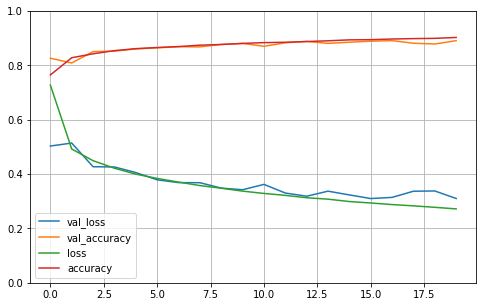

In [0]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

We see that both the training and validation accuracy increase during training, while loss decrease. The validation curves are quite close to the training curves, which means that there is not too much overfitting.

If you are not satisfied with the performance of the model, you can tune the model's hyperparameter and train the model again. You can modify the number of neurons per layer, the number of layers, the types of activation functions for each hidden layer, the number of epochs, the batch size (by default it is 32)...

We can evaluate the model on the test set to estimate the generalization error.

In [0]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8195000290870667


It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

We can get the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) and other measures of the model.


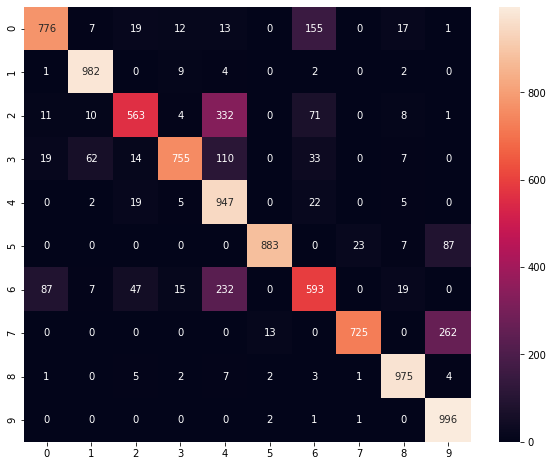

In [0]:
# Predict the values from the test dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d")

In [0]:
# Evaluate the network using test set
print("[INFO] evaluating network...")
predictions = model.predict(X_test)
print(predictions.argmax(axis=1))
print(y_test)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] evaluating network...
[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1000
           1       0.92      0.98      0.95      1000
           2       0.84      0.56      0.68      1000
           3       0.94      0.76      0.84      1000
           4       0.58      0.95      0.72      1000
           5       0.98      0.88      0.93      1000
           6       0.67      0.59      0.63      1000
           7       0.97      0.72      0.83      1000
           8       0.94      0.97      0.96      1000
           9       0.74      1.00      0.85      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000



We can use the model to make predictions on new instances.

In [0]:
y_proba_predictions = model.predict(X_test[:3])
print(y_proba_predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


For each instance the model estimates one probability per class, from class 0 to 9. 

We can also get the class with the highest estimated probability. 

In [0]:
y_predictions = model.predict_classes(X_test[:3])
print(y_predictions)
# print(np.array(class_names)[y_predictions])
print(y_test[:3])

[9 2 1]
[9 2 1]


The three first images on the test set are correctly predicted.

Despite our model performs reasonably well, there are other sorts of neural networks ([convolutional neural networks or CNN](https://en.wikipedia.org/wiki/Convolutional_neural_network)) which generally performs better when we want to feed the network with data from images.

# Resources


- https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

- https://www.tensorflow.org/tutorials/keras/classification